# Вариант 10

 #	Создайте таблицу "Patient" с полями "ID", "NAME", "AGE", "DIAGNOSIS".

In [2]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

# Подключение к базе данных
try:
    database_name = 'medical_db'
    connection = get_connection(database_name)
    cursor = connection.cursor()

    # SQL-запрос для создания таблицы
    create_table_query = """
    CREATE TABLE Patient (
        ID SERIAL PRIMARY KEY,
        NAME VARCHAR(100) NOT NULL,
        AGE INT CHECK (AGE > 0),
        DIAGNOSIS TEXT
    );
    """

    # Выполнение запроса
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица 'Patient' успешно создана!")

except Exception as e:
    print(f"Ошибка: {e}")

finally:
    if connection:
        cursor.close()
        connection.close()




Таблица 'Patient' успешно создана!


# Вставьте1 10данных о пациентах

In [4]:
import psycopg2

def add_new_patients():
    try:
        # Подключение к базе данных
        connection = psycopg2.connect(
            user="postgres",
            password="1",
            host="localhost",
            port="5432",
            database="medical_db"
        )
        cursor = connection.cursor()

        # SQL-запрос для добавления данных в таблицу Patient
        insert_query = '''
        INSERT INTO Patient (ID, NAME, AGE, DIAGNOSIS)
        VALUES
            (1, 'Alice Johnson', 30, 'Hypertension'),
            (2, 'Bob Smith', 25, 'Diabetes'),
            (3, 'Charlie Brown', 35, 'Asthma'),
            (4, 'Diana Prince', 40, 'Arthritis'),
            (5, 'Evan Williams', 50, 'Heart Disease');
        '''
        cursor.execute(insert_query)
        connection.commit()
        print("5 новых пациентов успешно добавлены в таблицу 'Patient'")

    except psycopg2.Error as error:
        print("Ошибка при работе с PostgreSQL:", error)
        if connection:
            connection.rollback()
    finally:
        # Закрытие соединения
        if connection:
            cursor.close()
            connection.close()
            print("Соединение с PostgreSQL закрыто")

# Вызов функции
add_new_patients()

5 новых пациентов успешно добавлены в таблицу 'Patient'
Соединение с PostgreSQL закрыто


# Обновите рабочие часы врача с ID=102

In [16]:
import psycopg2

def update_doctor_working_hours():
    try:
        # Подключение к базе данных
        connection = psycopg2.connect(
            user="postgres",
            password="1",
            host="localhost",
            port="5432",
            database="medical_db"
        )
        cursor = connection.cursor()

        # 1. Добавление нового столбца "Working_Hours" в таблицу Doctor
        add_column_query = '''
        ALTER TABLE Doctor
        ADD COLUMN IF NOT EXISTS Working_Hours VARCHAR(50);
        '''
        cursor.execute(add_column_query)
        print("Столбец 'Working_Hours' успешно добавлен (если его не было).")

        # 2. Обновление рабочих часов врача с ID=2
        update_query = '''
        UPDATE Doctor
        SET Working_Hours = %s
        WHERE Doctor_Id = %s;
        '''
        new_working_hours = "9:00 AM - 5:00 PM"  # Новые рабочие часы
        doctor_id = 102
        cursor.execute(update_query, (new_working_hours, doctor_id))
        connection.commit()

        # Проверка количества обновленных строк
        if cursor.rowcount > 0:
            print(f"Рабочие часы врача с ID={doctor_id} успешно обновлены на '{new_working_hours}'.")
        else:
            print(f"Врач с ID={doctor_id} не найден.")

    except psycopg2.Error as error:
        print("Ошибка при работе с PostgreSQL:", error)
        if connection:
            connection.rollback()
    finally:
        # Закрытие соединения
        if connection:
            cursor.close()
            connection.close()
            print("Соединение с PostgreSQL закрыто")

# Вызов функции
update_doctor_working_hours()

        


Столбец 'Working_Hours' успешно добавлен (если его не было).
Рабочие часы врача с ID=102 успешно обновлены на '9:00 AM - 5:00 PM'.
Соединение с PostgreSQL закрыто


# Обновите специальность врача с ID=104.

In [10]:
import psycopg2

def update_doctor_speciality():
    try:
        # Подключение к базе данных
        connection = psycopg2.connect(
            user="postgres",
            password="1",
            host="localhost",
            port="5432",
            database="medical_db"
        )
        cursor = connection.cursor()

        # SQL-запрос для обновления специальности врача с ID=104
        new_speciality = "Cardiologist"  # Новая специальность
        update_query = '''
        UPDATE Doctor
        SET Speciality = %s
        WHERE Doctor_Id = %s;
        '''
        cursor.execute(update_query, (new_speciality, 104))
        connection.commit()

        # Проверка количества обновленных строк
        if cursor.rowcount > 0:
            print(f"Специальность врача с ID=104 успешно обновлена на '{new_speciality}'.")
        else:
            print("Врач с ID=104 не найден.")

    except psycopg2.Error as error:
        print("Ошибка при работе с PostgreSQL:", error)
        if connection:
            connection.rollback()
    finally:
        # Закрытие соединения
        if connection:
            cursor.close()
            connection.close()
            print("Соединение с PostgreSQL закрыто")

# Вызов функции
update_doctor_speciality()



Специальность врача с ID=104 успешно обновлена на 'Cardiologist'.
Соединение с PostgreSQL закрыто


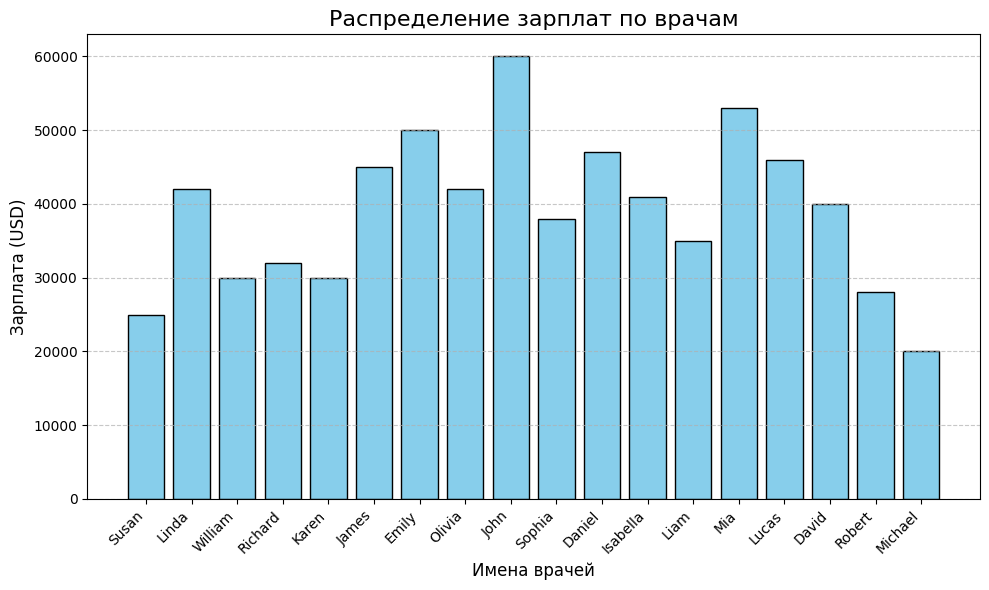

Соединение с PostgreSQL закрыто


In [1]:
import psycopg2
import matplotlib.pyplot as plt

def plot_salary_distribution():
    try:
        # Подключение к базе данных
        connection = psycopg2.connect(
            user="postgres",
            password="1",  # Замените на ваш пароль
            host="localhost",
            port="5432",
            database="medical_db"
        )
        cursor = connection.cursor()

        # SQL-запрос для получения данных о зарплатах врачей
        query = '''
        SELECT Doctor_Name, Salary
        FROM Doctor;
        '''
        cursor.execute(query)
        data = cursor.fetchall()

        # Разделение данных на имена врачей и их зарплаты
        doctor_names = [row[0] for row in data]
        salaries = [row[1] for row in data]

        # Построение столбчатой диаграммы
        plt.figure(figsize=(10, 6))
        plt.bar(doctor_names, salaries, color='skyblue', edgecolor='black')

        # Настройка графика
        plt.title('Распределение зарплат по врачам', fontsize=16)
        plt.xlabel('Имена врачей', fontsize=12)
        plt.ylabel('Зарплата (USD)', fontsize=12)
        plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X для удобства чтения
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Отображение графика
        plt.tight_layout()
        plt.show()

    except psycopg2.Error as error:
        print("Ошибка при работе с PostgreSQL:", error)
    finally:
        # Закрытие соединения
        if connection:
            cursor.close()
            connection.close()
            print("Соединение с PostgreSQL закрыто")

# Вызов функции
plot_salary_distribution()